In [1]:
import torch
import seaborn as sns
from utils import BNN
import matplotlib.pyplot as plt
import numpy as np
import json # for hyper paramameters
from datetime import datetime
import random
# import openturns as ot

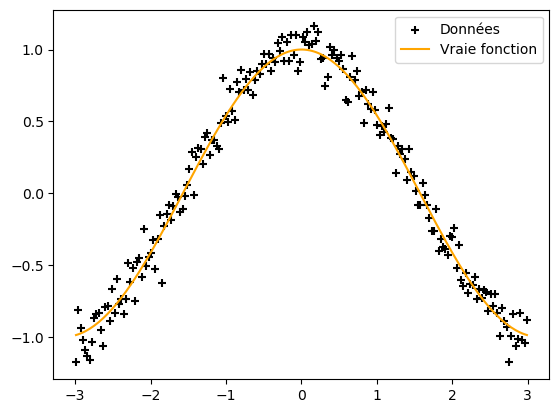

In [8]:
# Definition de la fonction de test
# def f(x, sigma):
#     epsilon = np.random.randn(*x.shape) * sigma
#     return 10*np.sin(2*np.pi*x) + epsilon

def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return np.cos(x) + epsilon


# Paramétrage des données d'entrainements
train_size = 200
noise = 0.1
# Pour sin
# xmin = -0.5
# xmax = 0.5

# Pour cos
xmin = -3
xmax = 3

zoomfig = 2
xminBig = xmin - zoomfig * (xmax - xmin)
xmaxBig = xmax + zoomfig * (xmax - xmin)

XBig = np.linspace(xminBig, xmaxBig, train_size * (2 * zoomfig + 1)).reshape(-1, 1)
X = XBig[train_size * zoomfig : train_size * zoomfig + train_size]
# X = np.linspace(-np.pi, np.pi, train_size).reshape(-1, 1)

y = f(X, sigma=noise)
y_true = f(X, sigma=0.0)


# On affiche tout ça
plt.scatter(X, y, marker='+', label='Données', color = 'k')
plt.plot(X, y_true, label='Vraie fonction', color = 'orange')
# plt.title('Noisy training data and ground truth')
plt.legend()
# plt.savefig('plots/SinPlot.png')
plt.show()

In [9]:
XTBig = torch.Tensor(XBig).reshape(XBig.shape)
XT = torch.Tensor(X).reshape(X.shape)
y = torch.Tensor(y).reshape(y.shape)
y_true = torch.Tensor(y_true).reshape(y_true.shape)

In [10]:
date = '11-04-2023_08-47-51'
f = open('hyperparameters/h' + date + '.txt')
hyperparameters = json.load(f)
f.close()
thetas = torch.load('thetas/Thetas' + date + '.pt')

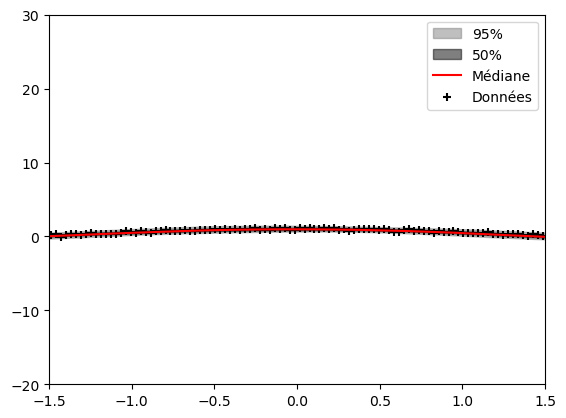

In [11]:
plt.clf()
BNN.plotTubeMedianBig(XT, XTBig, y, thetas,hyperparameters['structure'], 1)
plt.xlim(-1.5, 1.5)
plt.ylim(-20, 30)
# plt.savefig('plots/plotSinRes-{}.png'.format(date))
plt.show()

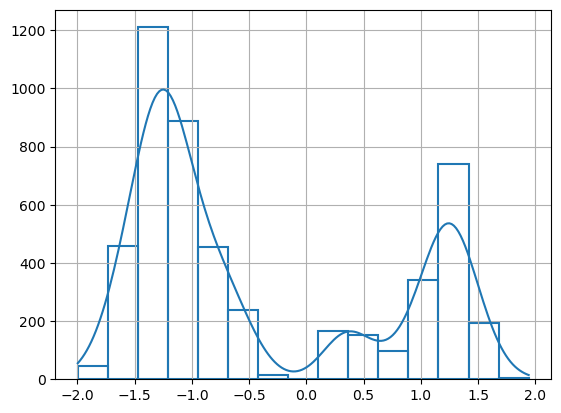

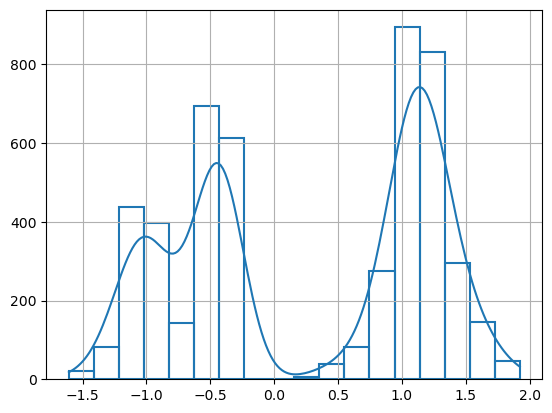

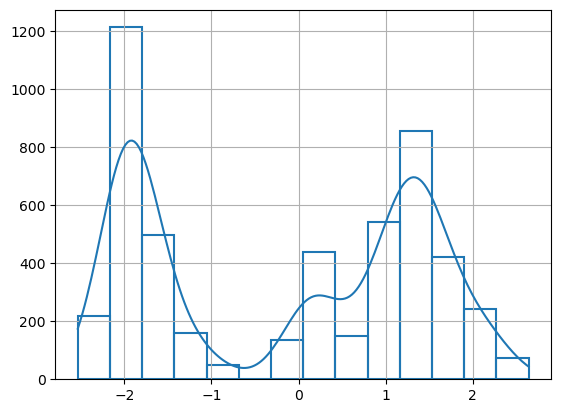

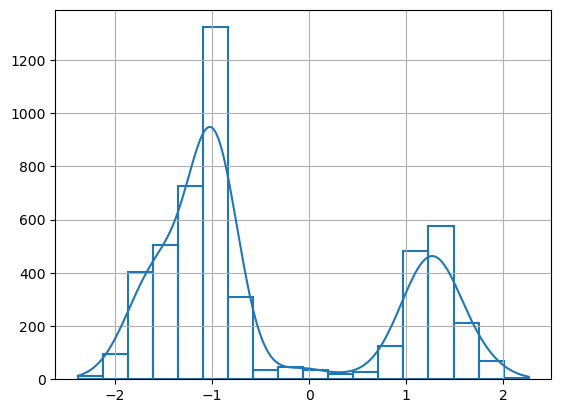

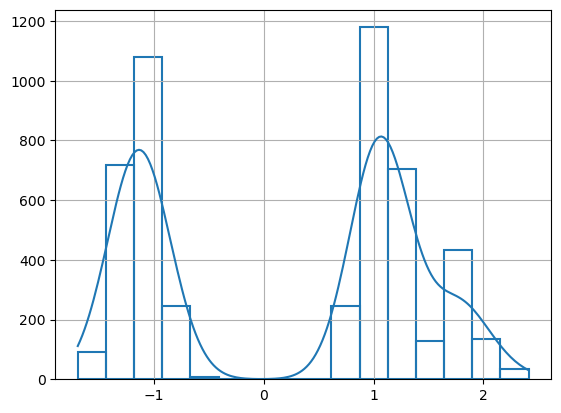

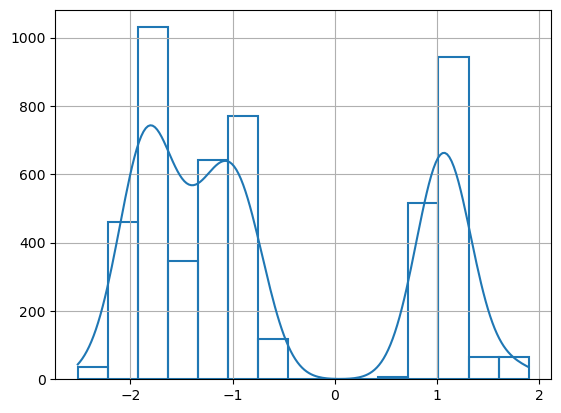

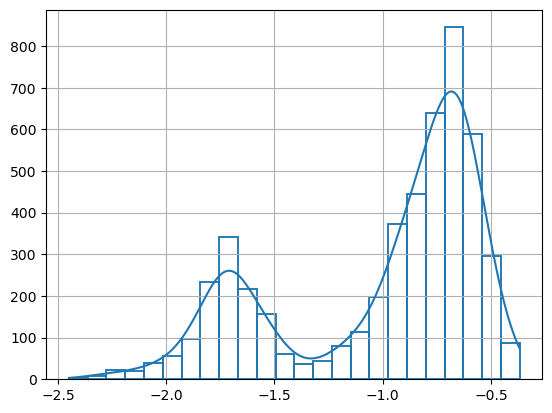

In [12]:
# kNum = 10
# ks = random.sample(list(range(thetas.shape[0])), kNum)
ks = list(range(thetas.shape[0]))
for k in ks :
    plt.figure()
    # sns.kdeplot(thetas[k,:].detach().numpy(),bw_adjust=.2)
    sns.histplot(thetas[k,:].detach().numpy(), kde = True, fill = False)
    plt.grid('on')
    plt.ylabel(None)
    # plt.savefig('plots/plotWeight-{}--{}.png'.format(date, k))


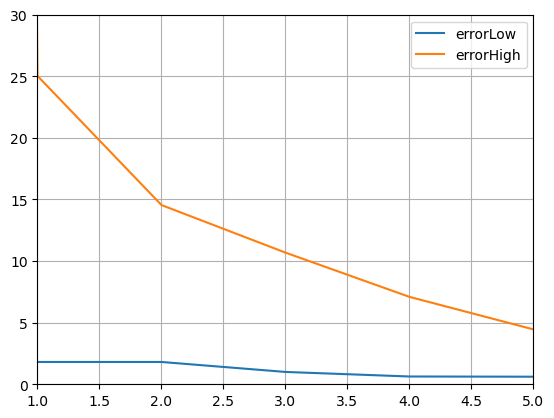

In [13]:
f = open('errors/er' + date + '.txt')
errors = json.load(f)
f.close()

plt.figure()
plt.plot(np.float32(errors["errorMin"]), label = 'errorLow')
plt.plot(np.float32(errors["errorMax"]), label = 'errorHigh')
plt.legend()
plt.grid("on")
plt.xlim(1, 5)
plt.ylim(0, 30)
plt.savefig('plots/plotErrorCos-{}--{}.png'.format(date,2))


<Figure size 640x480 with 0 Axes>

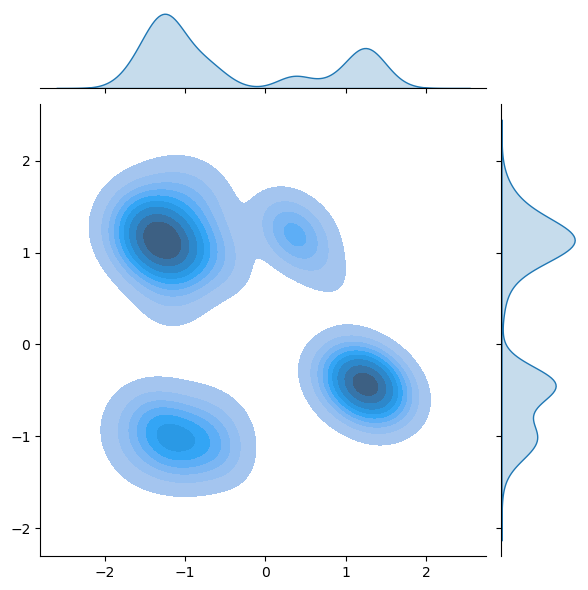

In [16]:
plt.figure()
s = 0
# d = 15 + 15 + 15 + 2
d = 1
sns.jointplot(x = thetas[s,:].detach().numpy(), y = thetas[d,:].detach().numpy(), kind='kde', fill=True)
# sns.histplot(x = thetas[0,:].detach().numpy(), y = thetas[1,:].detach().numpy(),binwidth=(0.2, .2))
plt.savefig('plots/plotWeigthJoint-{}--{}&{}.png'.format(date,s,d))
plt.show()

In [12]:
y_hats = torch.concat(
        tuple([BNN.FNN(hyperparameters['structure'], thetas[:, i]).forward(XTBig) for i in range(0, hyperparameters['N'])]), 1)

In [27]:
XTBig[0][0]

tensor(-2.5000)

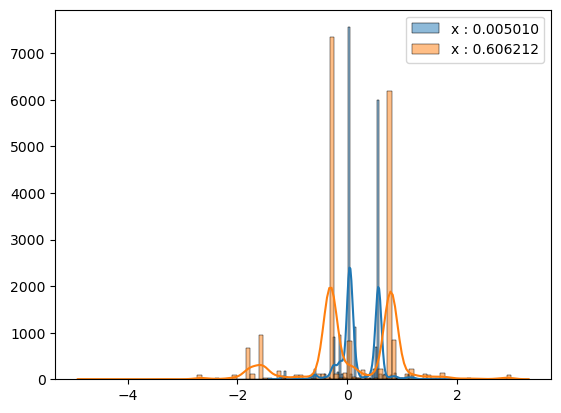

In [31]:
middle = torch.argmin(torch.abs(XTBig))
sns.histplot(y_hats[middle + 1,:].detach().numpy(), kde = True, label = 'x : {:2f}'.format(XTBig[middle+1][0]))
sns.histplot(y_hats[310,:].detach().numpy(), kde = True, label = 'x : {:2f}'.format(XTBig[310][0]))
plt.ylabel(None)
plt.legend()
plt.savefig('plots/plotIncertitudeSortie-{}--{}&{}.png'.format(date,s,d))